# Discusión 5: interpolación de Lagrange

En las siguientes semanas discutiremos temas sobre aproximación polinomial, los cuales serán unificados a través de una importante definición: la de **espacio vectorial**. Cuando pensamos en vectores, solemos imaginar segmentos de recta dirigidos en $\mathbb{R}^{2}$ o $\mathbb{R}^{3}$. Si bien estos espacios son útiles para ilustrar el concepto, resulta provechoso considerar otros objetos significativamente diferentes y englobarlos bajo el término vector. Un vector es, simplemente, un elemento de un espacio vectorial.

**Definición 1.** Un *espacio vectorial* $\mathcal{V}$ sobre $\mathbb{R}$ es un conjunto $\mathcal{V}$ con dos operaciones:
1. (Adición de vectores) +: $\mathcal{V} \times \mathcal{V} \rightarrow \mathcal{V}$
2. (Multiplicación por un escalar) $\cdot : \mathbb{R} \times \mathcal{V} \rightarrow \mathcal{V}$

que satisfacen las siguientes ocho propiedades para cualesquiera $u, v, w \in \mathcal{V}$ y $\alpha, \beta \in \mathbb{R}$:

1. (Asociatividad de la suma) $u + (v + w) = (u + v )+ w$
2. (Conmutatividad de la suma) $u + v = v + u $
3. (Existencia de un elemento neutro) Existe un elemento $\mathbf{0} \in \mathcal{V}$ tal que $v + \mathbf{0} = v$
4. (Existencia de inversos) Para cada $v$ en $\mathcal{V}$ existe un elemento $-v$ en $\mathcal{V}$ tal que $v + (-v) = \mathbf{0}$
5. $\alpha \cdot ( \beta \cdot v) = \alpha \beta \cdot (v)$
6. $1 \cdot v = v$
7. $\alpha \cdot( v + w ) = \alpha \cdot v + \alpha \cdot w$
8. $(\alpha + \beta) \cdot v = \alpha \cdot v + \beta \cdot v .$

Existen varios conjuntos que satisfacen esta definición y cuyos elementos se consideran, por tanto, vectores. En este momento nos concierne un tipo en especial:

**Definición 2.** $\mathcal{P}_{n}$ denota el *espacio vectorial* sobre $\mathbb{R}$ de todos los polinomios reales de grado menor o igual a $n$. 

Con esta definición, podemos enunciar el problema de interpolación.

---
**Entrada:** $n + 1$ números reales **diferentes** $x_{0}, x_{1}, x_{2} \ldots ,x_{n}$ y $ n + 1$ números reales $y_{0}, y_{1}, y_{2}, \ldots ,y_{n} $.

**Salida:** $p_{n} \in \mathcal{P}_{n}$ que cumpla la propiedad de interpolación:

*(Propiedad de interpolación)* $p_{n}(x_{i}) = y_{i}$ para $i = 0,  1, 2, \ldots , n$.

---

## Dependencias

In [32]:
from sympy import * # Usaremos SymPy como herramienta para realizar manipulaciones simbólicas

# Las siguientes dos librerías serán utilizadas para graficar
import matplotlib.pyplot as plt;
import numpy as np

# Usaremos lo siguiente para mostrar los polinomios de forma bonita
from sympy.interactive import printing;
printing.init_printing(use_latex=True);
from IPython.display import display, Latex

Ahora declaramos $\texttt{x}$ como un símbolo, que representará nuestra variable en el polinomio.

In [33]:
x = Symbol('x')

Como primer ejercicio, construiremos el polinomio de interpolación de Lagrange cuadrático para la función $\sin(\pi x)$ con nodos $x_{0} = 1, x_{1} = 1.25, x_{2} = 1.6$.

## Datos de entrada

In [34]:
def f(z):
    return sin(pi*z)

xs = [1, 1.25, 1.6]
ys = [f(1), f(1.25), f(1.6)]

Desarrollando la fórmula de Lagrange:

$$ p_{2}(x) = \sum_{k=0}^{2} y_{k} \ell_{k}(x)  =  y_{0} \ell_{0}(x)  + y_{1} \ell_{1}(x)  +   y_{2} \ell_{2}(x) $$

donde

$$\ell_{k}(x) = \prod_{i = 0, i \neq k}^{2} \frac{x - x_{i}}{x_{k} - x_{i}}. $$

Las funciones $\ell_{k}(x)$ se denominan **funciones base de Lagrange**, de forma que todo polinomio de Lagrange es una combinación lineal de estas funciones base. Así, 

$$ p_{2}(x) =  y_{0} \frac{x - x_{1}}{x_{0} - x_{1}}\frac{x - x_{2}}{x_{0} - x_{2}}  + y_{1} \frac{x - x_{0}}{x_{1} - x_{0}}\frac{x - x_{2}}{x_{1} - x_{2}}  +   y_{2} \frac{x - x_{0}}{x_{2} - x_{0}}\frac{x - x_{1}}{x_{2} - x_{1}} $$

Se deja de tarea al lector comprobar que este polinomio satisface la propiedad de interpolación para los tres nodos que hemos especificado arriba.

A partir de la fórmula anterior, podemos notar dos problemas con la fórmula de Lagrange:

1. La cantidad de operaciones que se requiere para calcular el polinomio crece cuadráticamente con el grado del polinomio: se requieren $n + 1$ sumas y cada término que se suma requiere $n$ multiplicaciones. De forma que calcular el polinomio interpolante con la fórmula de Lagrange es un problema con complejidad $\mathcal{O}(n^{2})$.

2. Este procedimiento se vuelve numéricamente inestable a medida que aumenta el grado del polinomio. Esto quiere decir que los errores de redondeo se acumulan y hacen que perdamos precisión rápidamente.

De esto se deduce que la fórmula de Lagrange es una importante herramienta teórica, pero resulta poco práctica de utilizar a medida que aumenta el grado del polinomio. A pesar de estas observaciones, la utilizaremos para producir el polinomio interpolante en casos *bien portados*:

In [13]:
'''
Esta primera función calcula la combinación lineal. Es una traducción directa de la fórmula e 
invoca la función lagrangeBasisFunction para calcular las funciones base.
xs: arreglo con valores en x
ys: arreglo con valores en y
degree: grado del polinomio
'''
def lagrangePolynomial(xs, ys, degree):
    polynomial = 0.0;
    for i in range(0, degree + 1):
        polynomial += ys[i]*lagrangeBasisFunction(xs, degree, i)
    return polynomial    
   
'''
Esta función calcula la función base correspondiente. Es, también, una traducción directa de la fórmula.
xs: arreglo con valores en x
degree: grado del polinomio, índice superior del producto
k: índice de la función base 
'''    
def lagrangeBasisFunction(xs, degree, k):
    L = 1.0
    for i in range(0, degree + 1):
        if i == k:
            continue
        else:
            L *= (x - xs[i])/(xs[k] - xs[i])
    return L        

Ahora construimos el polinomio, lo guardamos en la variable $\texttt{pol}$ y lo mostramos, luego de hacer simplificaciones con la función $\texttt{simplify}$ de SymPy:

In [15]:
pol = lagrangePolynomial(xs, ys, 2)
display(Latex('$$ p_{2}(x) = '+ latex(simplify(pol.evalf())) + '$$'))

<IPython.core.display.Latex object>

Si deseamos evaluar algún punto en este polinomio, por ejemplo $p_{2}(1.6)$, escribimos

In [29]:
pol.subs(x, 1.6).evalf()

Notemos que 

In [30]:
f(1.6).evalf()

Debe notarse que el polinomio de interpolación difiere de la función que aproxima, salvo en los nodos, donde es (teóricamente) igual a la función.

Ahora graficamos, usando las herramientas que ofrecen la librerías $\texttt{matplotlib}$ y $\texttt{numpy}$:

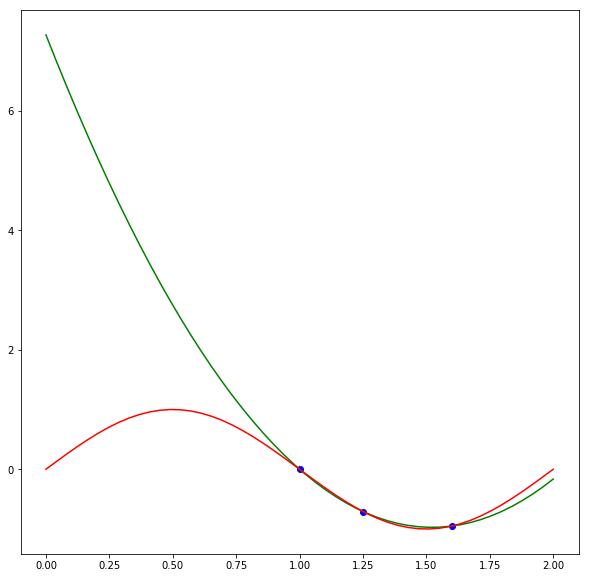

In [31]:
fig, ax = plt.subplots(figsize=(10, 10));

lambdaf = lambdify(x, pol)

xv = np.linspace(0, 2, 50);
ax.plot(xv, lambdaf(xv), color='green');
ax.plot(xv, np.sin(np.pi*xv), color = 'red')
ax.scatter(xs, ys, color='blue', marker='o');
plt.show(); 

En rojo se muestra la función $\sin(\pi x)$ y en verde el polinomio cuadrático de interpolación. En azul los nodos. Queda de ejercicio para el lector producir el polinomio de grado $3$ y escribir su fórmula agregando el nodo $x_{2} = 2.0$. 

Para los problemas de interpolación no es necesario que nos den una función a interpolar: podrían darnos solo una nube de puntos a través de la cual debe pasar el polinomio. Por ejemplo, si se tienen datos de un censo, podría producirse un polinomio de interpolación para estimar los datos en medio de los valores conocidos. Este caso se desarrolló en discusión con el ejercicio enunciado en la primera página del capítulo de interpolación de **[2]**.

**Teorema.** La solución al problema de interpolación enunciado arriba es única.

*Demostración*. Supongamos que existe otro polinomio $q_{n} \in \mathcal{P}_{n}$ que satisface la propiedad de interpolación. Ahora consideremos el polinomio $p_{n} - q_{n}$. Podemos hacer las siguientes observaciones:

1. $p_{n} - q_{n}$ es un polinomio de grado menor o igual a $n$, es decir, está en $\mathcal{P}_{n}$.
2. Al evaluar los nodos en este polinomio, obtenemos:

$$ p_{n}(x_{0}) - q_{n}(x_{0}) = y_{0} - y_{0} = 0 $$
$$ p_{n}(x_{1}) - q_{n}(x_{1}) = y_{1} - y_{1} = 0 $$
$$ \vdots $$
$$ p_{n}(x_{n}) - q_{n}(x_{n}) = y_{n} - y_{n} = 0 $$

es decir, $p_{n} - q_{n}$ tiene $n + 1$ raíces. Un polinomio en $\mathcal{P}_{n}$ tiene exactamente $n$ o menos raíces en $\mathbb{R}$, al menos que sea idéntico al polinomio $0$. Puesto que nuestro polinomio $p_{n} - q_{n}$ tiene $n+1$ raíces, concluimos que 

$$ p_{n} - q_{n} = 0 $$

de lo que se sigue que $p_{n} = q_{n}$. Por tanto, concluimos que existe un único polinomio de interpolación de grado menor o igual a $n$. $\square$

## Referencias

**[1]** Süli, Endre & Mayers, David (2003). *An Introduction to Numerical Analysis*. Cambridge
University Press.

**[2]** El buen Burden.